In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# 맥 한글 버전 설치 
plt.rc("font",family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

## 1. Matplotlib vs Seaborn 

### 1.1 matplotlib과 seaborn 중 먼저 배워야하는 것은? 

- 두 라이브러리는 일장일단이 명확함 
- 간단하게 그릴 때는 `seaborn`, 폰트나 색상을 많이 손대려면 `matplotlib` 을 사용하는 것을 추천함 
- 특히 seaborn 의 경우, KDE plot 같은 통계 그래프를 쉽게 그릴 수 있음

### 1.2 Seaborn의 태생 

- matplotlib을 쉽게 사용하기 위해 만들어짐
- 통계 시각화에 집중하기 위해 만들어짐 
- 그래서 __데이터 분석__ 에는 seaborn이 좋고 
- 기능을 일부 희생했기에 그 외의 용도는 matplotlib이 좋음 

(그렇기 때문에 손을 많이 댈때에는 명령어 난이도가 높아지는 단점이 있음)

### 1.3 matplotlib 그림과 seaborn 그림의 관계 

> `matplotblog` : Pyplot vs Object Oriented Interface   
> `seaborn` : FacetGrid

- matplotlib 에서 그림을 그리면 `figure`와  `axes`를 생성하고 `axes`안에 그림을 그림.  
- `figure` 생성은 "도화지를 펼친다"  
- `axes` 생성은 도화지에 네모 칸을 친다로 이해하면 됨.
- 명령어 방식에 따라 이 안에 그리는 그림을 어떻게 그리는지가 달라짐 

#### (1) pyplot : 상태 기반 (state-based) 인터페이스 
- 명령어 한 줄이 입력되면 그림이 수정되고 변경된 상태는 `state`가 다음 단계로 계속해서 전달이 됨. 
- 이처럼 명령어가 상태에 반영되어 전달되는 방식을 `상태기반(state-based) 인터페이스` 라고 함. 
- 따라서, 명령어의 __순서__ 에 민감하고, 그림 준비 과정이 따로 없어 __빠르게__ 그릴 수 있음. 
- figure와 axes는 명령어에 따라 __그때그때 자동으로 생성__

#### (2) object oriented : 객체 지향 인터페이스 
- 그림을 그리기 전에 틀을 다 갖춰놓고 시작함 
- 도화지 크기는 얼마이고 어디에 어떤 모양의 틀 `axes`이 놓일지 정함. 
- 틀마다 __이름__ 과 __번호__ 를 붙이고 그림을 그리기에 __공간__ 으로 제어함. 
- 그림 여기저기를 __하나씩 손대기 좋지만__ 대충 뚝딱 그리기에는 시간이 오래 걸림 

#### Seaborn의 명령어 
- 어떤 명령어는 `figure`와 유사한 `FacetGrid`를 출력함 : relplot()(\*relational_plot), displot()(\*distribution_plot), cat_plot()(\*category_plot)  
이런 명령어는 출력 결과에 `.fig` 나 `.axes`를 붙임으로써 속성에 접근할 수 있게 됨. 
- 어떤 명령어는 `axes`를 출력함 : kdeplot(),violinplot() 등등  
이런 명령어의 출력 결과는 matplotlib `subplots`에 끼워 넣기 좋음   
그러나 곧장 저장이 안됨 >>> `axes` 객체는 `savefig` 메소드가 없기 때문


> 그런데 `axes`를 출력하는 명령어도 `pyplot` 처럼 행동할 때가 있음   
`figure`와 `axes`를 준비하지 않고 단독으로 사용할 때 그럼    

<br></br>

> 한마디로 __필요에 따라 행동한다__ 는 것  
    - 일종의 duck-typing처럼 보임 
    - 다만, 만들때는 편한데, 손대리면 헷갈리기 쉬운 이유 
    - 특히 matplotlib의 두가지 방식에 대한 지식이 부족하면 헷갈리기 쉬움 

<br></br>

> 이럴 때는 matplotlib이 차라리 쉬움
    - 기존에 있던 seabornd의 근본적인 문제 
    - seaborn plot을 제어할 때는 기본 속성을 알아야 혼동이 없음 

## 2. Seaborn plots 

|relplot(relational)|displot(distributions)|catplot(categorical)|
|---|---|---|
|scatterplot|histplot|stripplot|
|lineplot|kdeplot|swarmplot|
||ecdfplot|boxplot|
||rugplot|violingplot|
|||pointplot|
|||barplot|

seaborn 은 크게 3가지 형태의 __데이터 plot__ 을 지원함   
    - `relational plots` :   
        >>> `FacetGrid`: `relplot()`  
        >>> `axes` : `scatterplot()`,`lineplot()`  

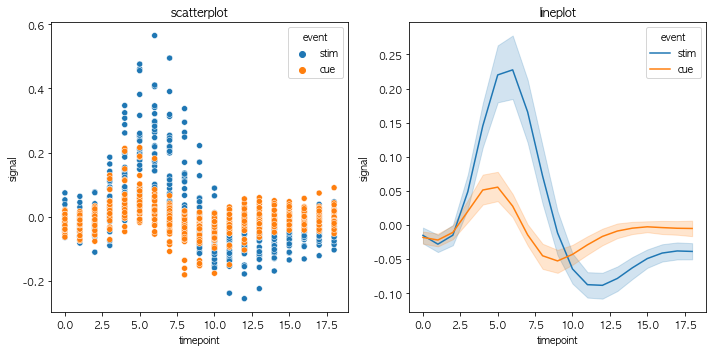

In [23]:
fmri = sns.load_dataset("fmri")
fig,axes = plt.subplots(nrows=1 , ncols=2, figsize=[10,5])

g1 = sns.scatterplot(data=fmri, x='timepoint',y='signal',hue='event',ax= axes[0])
axes[0].set_title("scatterplot")
g2 = sns.lineplot(data = fmri, x='timepoint', y= 'signal',hue='event',ax=axes[1])
axes[1].set_title("lineplot")
plt.tight_layout()
plt.show()
# sns.histplot(data = penguins,x ='flipper_length_mm',hue = 'species', multiple ='stack')

    - distribution plots:
        >>> `FacetGrid` : displot()   
        >>> `axes` : `histplot()`, `kdeplot()`, `ecdfplot()`, `rugplot()` 


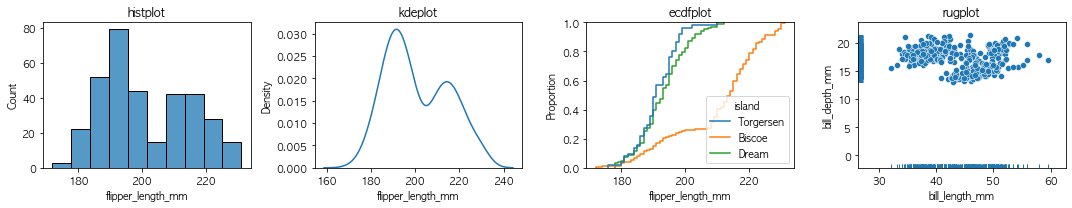

In [41]:
penguins = sns.load_dataset("penguins")
fig,axes = plt.subplots(ncols=4,figsize=[15,3])
g1 = sns.histplot(data = penguins, x='flipper_length_mm',bins= 10,ax=axes[0])
axes[0].set_title("histplot")
g2 = sns.kdeplot(data = penguins, x='flipper_length_mm',ax=axes[1])
axes[1].set_title("kdeplot")
g3 = sns.ecdfplot(data= penguins, x='flipper_length_mm',hue='island',ax=axes[2])
axes[2].set_title('ecdfplot')
g4 = sns.rugplot(data =penguins, x= 'bill_length_mm',y = 'bill_depth_mm',ax=axes[3])
g5 = sns.scatterplot(data= penguins, x= 'bill_length_mm',y='bill_depth_mm',ax=axes[3])
axes[3].set_title("rugplot")
plt.tight_layout()
plt.show()

    - `categorical plots` :
        >>> `FacetGrid` : `catplot()`
        >>> `axes` : `stripplot()`, `swarmplot()`, `boxplot(), `violinplot()`, `boxenplot()` ,`pointplot()`, `barplot()`, `countplot()`

In [42]:
tips = sns.load_dataset('tips')
titanic = sns.load_dataset("titanic")

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


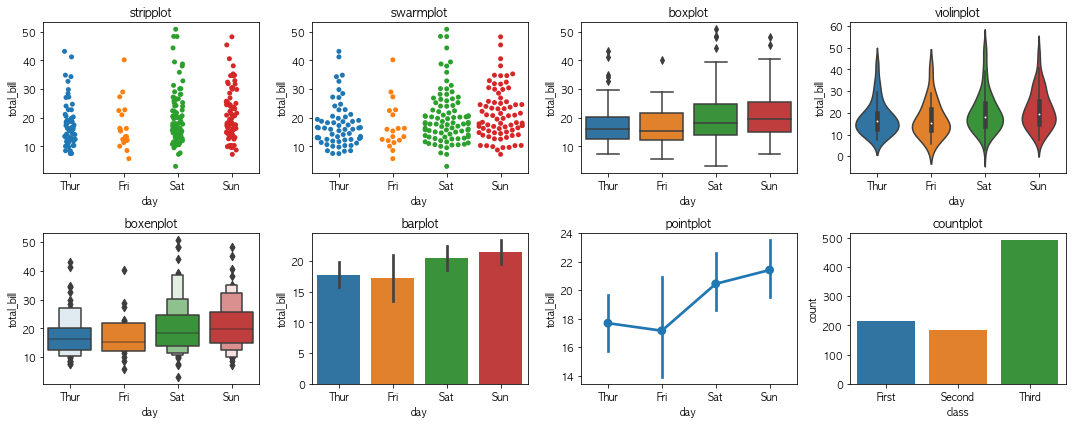

In [48]:
fig,ax = plt.subplots(nrows=2,ncols=4,figsize=[15,6])
g1 = sns.stripplot(data = tips,x='day',y='total_bill',ax=ax[0][0])
ax[0][0].set_title('stripplot')
g2 = sns.swarmplot(data = tips,x='day', y= 'total_bill', ax= ax[0][1])
ax[0][1].set_title('swarmplot')
g3 = sns.boxplot(data = tips, x='day', y= 'total_bill', ax= ax[0][2])
ax[0][2].set_title("boxplot")
g4 = sns.violinplot(data =tips , x = 'day', y= 'total_bill', ax= ax[0][3])
ax[0][3].set_title("violinplot")
g5 = sns.boxenplot(data= tips, x='day', y= 'total_bill', ax= ax[1][0])
ax[1][0].set_title("boxenplot")
g6 = sns.barplot(data = tips, x='day', y= 'total_bill', ax=ax[1][1])
ax[1][1].set_title("barplot")
g7 = sns.pointplot(data= tips, x='day',y='total_bill',ax=ax[1][2])
ax[1][2].set_title("pointplot")
g8 = sns.countplot(data = titanic, x= 'class',ax=ax[1][3])
ax[1][3].set_title("countplot")
plt.tight_layout()
plt.show()

그리고 크게 2가지 형태의 __통계분석 plot__ 을 지원함

- regression plots:
    - `FacetGrid`: lmplot()
    - `axes` : regplot(),residplot()

- matrixplots:
    - `FacetGrid`: - 
    - `axes` : heatmap(), clustermap()

In [58]:
iris =sns.load_dataset('iris')

In [60]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


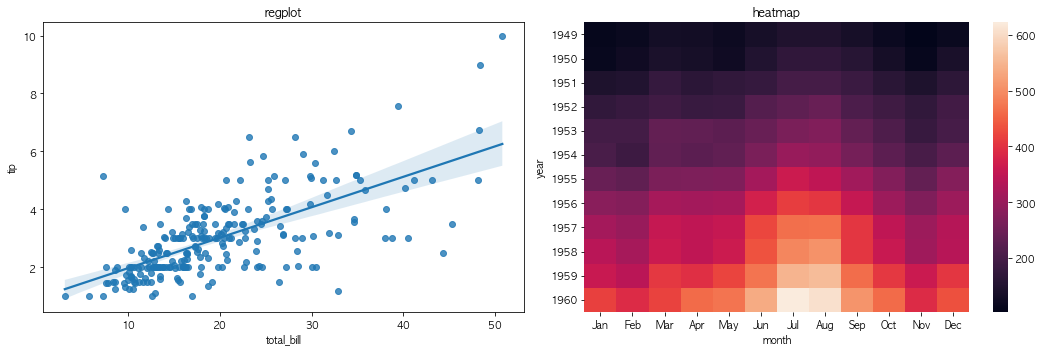

In [63]:
fig,ax = plt.subplots(nrows=1,ncols=2, figsize=[15,5])
g1 = sns.regplot(data =tips, x='total_bill',y='tip',ax = ax[0])
ax[0].set_title("regplot")
g2 = sns.heatmap(data= flights.pivot_table(index='year',columns='month',values='passengers'),ax=ax[1])
ax[1].set_title("heatmap")
plt.tight_layout()


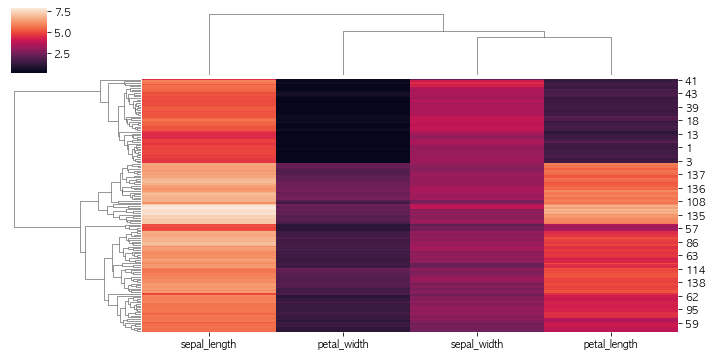

In [66]:
sns.clustermap(iris,figsize=[10,5])

- 3가지 multi-plot을 제공함
    - FacetGrid, PairGrid, JointGrid

In [78]:
\